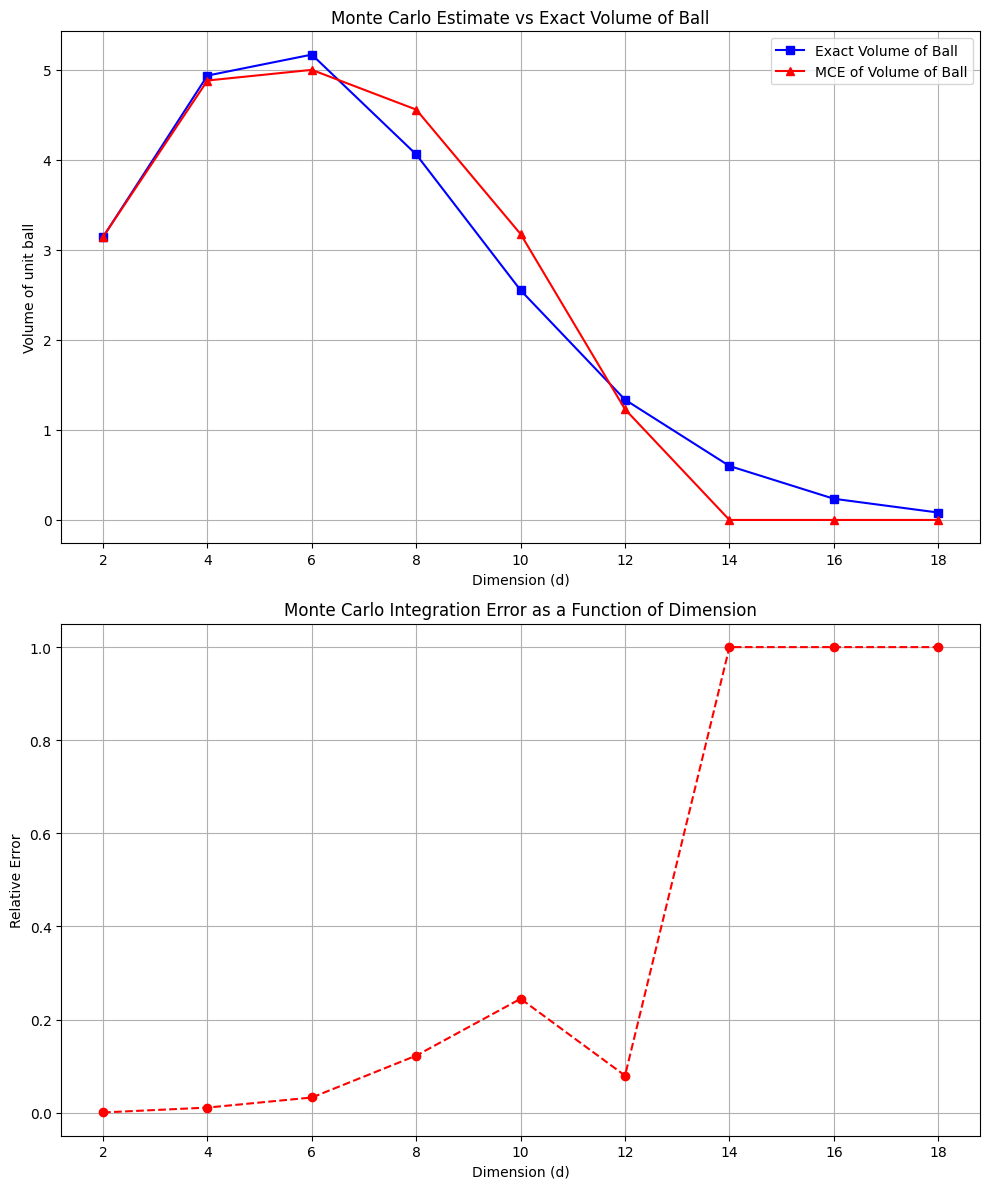

,Dimension (d),Volume of Ball,MC Volume of Ball,Relative Error
0,2,3.141593,3.1436,0.000639
1,4,4.934802,4.8800,0.011105
2,6,5.167713,4.9984,0.032764
3,8,4.058712,4.5568,0.122721
4,10,2.550164,3.1744,0.244783
5,12,1.335263,1.2288,0.079732
6,14,0.599265,0.0000,1.000000
7,16,0.235331,0.0000,1.000000
8,18,0.082146,0.0000,1.000000


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import gamma

# Function to calculate the exact volume of a unit ball in d dimensions
# https://en.wikipedia.org/wiki/Volume_of_an_n-ball
def exact_volume_of_ball(d):
    return (np.pi ** (d / 2)) / gamma((d / 2) + 1)

# Monte Carlo estimate of the volume of a unit ball in d dimensions
def monte_carlo_ball_volume(d, n_points=10000):
    points = np.random.rand(n_points, d) * 2 - 1  # Random points in [-1, 1]^d
    distances = np.linalg.norm(points, axis=1)     # Calculate Euclidean distance
    inside_ball = np.sum(distances <= 1)         # Count points inside the sphere
    cube_volume = 2 ** d                           # Volume of the hypercube [-1, 1]^d
    estimated_volume = (inside_ball / n_points) * cube_volume  # Monte Carlo estimate
    return estimated_volume

# Dimensions to test
dimensions = [2, 4, 6, 8, 10, 12, 14, 16, 18]
n_points = 10000
MC_volumes = []
ball_volumes = []
errors = []

# Calculate Monte Carlo estimates and errors for different dimensions
for d in dimensions:
    monte_carlo_volume = monte_carlo_ball_volume(d, n_points)
    MC_volumes.append(monte_carlo_volume)
    exact_volume = exact_volume_of_ball(d)
    ball_volumes.append(exact_volume)
    relative_error = abs(monte_carlo_volume - exact_volume) / exact_volume
    errors.append(relative_error)

# Create a DataFrame for visualization
df_monte_carlo = pd.DataFrame({
    'Dimension (d)': dimensions,   
    'Volume of Ball': ball_volumes,
    'MC Volume of Ball': MC_volumes,
    'Relative Error': errors
})

# Creating a figure with two subplots (one above the other)
plt.figure(figsize=(10, 12))  # Adjust the height to fit both plots

# First subplot for Volume of Ball vs Monte Carlo Estimate
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.plot(dimensions, ball_volumes, marker='s', linestyle='-', color='b', label='Exact Volume of Ball')
plt.plot(dimensions, MC_volumes, marker='^', linestyle='-', color='r', label='MCE of Volume of Ball')
plt.xlabel('Dimension (d)')
plt.ylabel('Volume of unit ball')
plt.title('Monte Carlo Estimate vs Exact Volume of Ball')
plt.grid(True)
plt.legend()

# Second subplot for Monte Carlo Integration Error
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.plot(dimensions, errors, marker='o', linestyle='--', color='r')
plt.xlabel('Dimension (d)')
plt.ylabel('Relative Error')
plt.title('Monte Carlo Integration Error as a Function of Dimension')
plt.grid(True)

# Adjust the layout and show the combined plot
plt.tight_layout()  # Ensures there is no overlap between subplots
plt.show()

display(df_monte_carlo)

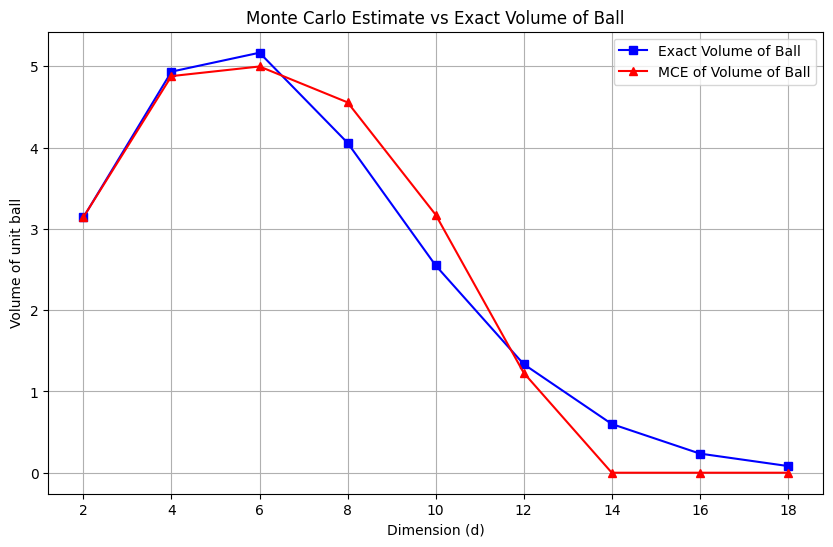

In [12]:
# Plotting the result
plt.figure(figsize=(10, 6))

# Plotting Volume of Ball
plt.plot(dimensions, ball_volumes, marker='s', linestyle='-', color='b', label='Exact Volume of Ball')

# Plotting MC Volume of Ball
plt.plot(dimensions, MC_volumes, marker='^', linestyle='-', color='r', label='MCE of Volume of Ball')

# Adding labels, title, and grid
plt.xlabel('Dimension (d)')
plt.ylabel('Volume of unit ball')
plt.title('Monte Carlo Estimate vs Exact Volume of Ball')
plt.grid(True)

# Adding a legend
plt.legend()

# Showing the plot
plt.show()